<a id='Table of Contents'></a><h1>Table of Contents</h1>

- <a href='#introduction'>Introduction</a> 
- <a href='#imports'>Import and install required libraries</a>  
- <a href='#setting_fitting'>Setting of fitting</a>  
- <a href='#run_fit'>Running the fit</a>  
- <a href='#results'>Showing the results</a> 

(<a href='#Table of Contents'>Top</a>)<a id='introduction'></a><h2>Introduction</h2>

<div class="alert alert-block alert-info">
The objective of this notebook is to show how to use the <b>Chudley Elliot diffusion</b> model to perform some 
fits using <a href="https://github.com/bumps/bumps">bumps</a> .
</div>

### Physical units
Please note that the following units are used for the QENS models

| Type of parameter | Unit          |
| ----------------- |---------------|
| Time              | picosecond    |
| Length            | Angstrom      |
| Momentum transfer | 1/Angstrom    |

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2> Import python modules for plotting, fitting... </h2>

In [1]:
# Imported required libraries
from __future__ import print_function
import sys
import os

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# for interactive plots
import panel
panel.extension()
import panel.widgets as pnw

In [2]:
# install bumps (if not already installed)
import pkgutil
if not pkgutil.find_loader("bumps"):
    !{sys.executable} -m pip install bumps

# check version of bumps installed
# Information message if installed version not recent enough
import bumps

from distutils.version import StrictVersion
if StrictVersion(bumps.__version__) <= StrictVersion('0.7.6'):
    print("""The version of bumps installed is not recent 
    enough to run the examples. 
    Please update bumps. The minimum version required is 0.7.8""")

In [3]:
#from scipy.integrate import simps
from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty

 (<a href='#Table of Contents'>Top</a>)<a id='setting_fitting'></a><h2>Setting of fitting </h2>
<h3> create reference data and fitting model and set initial guesses </h3>

In [4]:
# install QENSmodels (if not already installed)

if not pkgutil.find_loader("QENSmodels"):
    !{sys.executable} -m pip install git+https://github.com/QENSlibrary/QENSmodels#egg=QENSmodels

<h3> create reference data</h3>

In [17]:
import QENSmodels

xx = np.linspace(-5,5,100)
q = np.linspace(0.2,2,10)
chudley_elliot_noisy = QENSmodels.sqwChudleyElliotDiffusion(xx, q, scale=1, center=0, D=0.23,
                              L=1.0)*(1+0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)

<h3> plot reference data</h3>

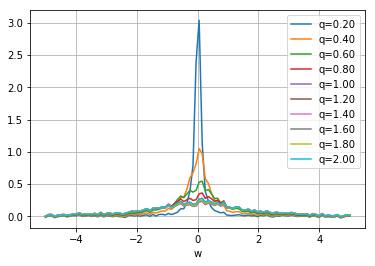

In [18]:
for i in range(len(q)):
    plt.plot(xx,chudley_elliot_noisy[i], label='q={:.2f}'.format(q[i]))
plt.grid()
plt.xlabel('w')

plt.legend()
plt.show()

<h3> create fitting model</h3>

In [41]:
M = []

for i in range(len(q)):

    # Bumps fitting model
    Mq = Curve(QENSmodels.sqwChudleyElliotDiffusion, xx, chudley_elliot_noisy[i], q[i], scale=1, center=0, D=0.2, L=0.5)
    Mq.scale.range(0, 1e5)
    Mq.center.range(-0.1,0.1)
    Mq.D.range(0,1)
    Mq.L.range(0,3)
    
    # Q-independent parameters
    if i == 0:
        QD = Mq.D
        QL = Mq.L
    else:
        Mq.D = QD
        Mq.L = QL
      
    M.append(Mq)
        
problem = FitProblem(M)

<h3> Choice of minimizer for bumps </h3>

In [42]:
options_dict={'Levenberg-Marquardt': "lm", 
             'Nelder-Mead Simplex': "amoeba", 
             'DREAM': "dream", 
             'Differential Evolution': "de", 
             'Quasi-Newton BFGS': "newton", 
             'Random Lines (experimental)': "rl", 
             'Particle Swarm (experimental)': "ps", 
             'Parallel Tempering (experimental)': "pt"}

w_choice_minimizer= pnw.Select(name='Minimizer:', options=list(options_dict.keys()), value='Levenberg-Marquardt')

w_choice_minimizer

Select(name='Minimizer:', options=OrderedDict([('Levenberg-M...]), value='Levenberg-Marquardt')

<h3> Setting for running bumps </h3>

In [43]:
steps_fitting = pnw.TextInput(
        placeholder='number of steps when fitting',
        width=250,
        name='Number of steps for fit:', value='100')
steps_fitting

TextInput(name='Number of steps f..., placeholder='number of steps w..., value='100', width=250)

In [44]:
# Input chosen values to related fitting variables
# CHOICE OF MINIMIZER
chosen_minimizer = options_dict[w_choice_minimizer.value]

# NUMBER OF STEPS WHEN RUNNING THE FIT
steps = int(steps_fitting.value)

Initial chisq 3.017(25)


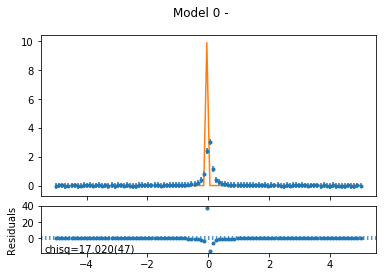

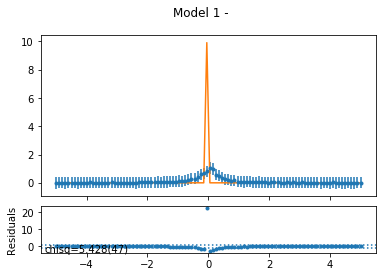

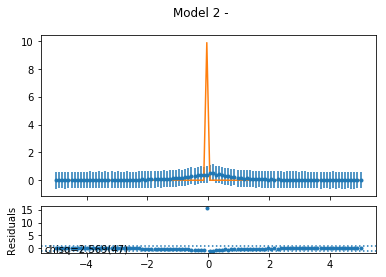

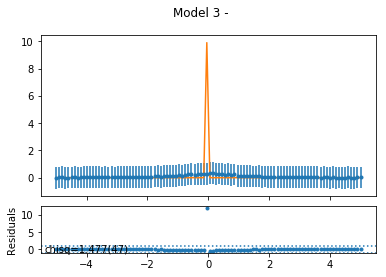

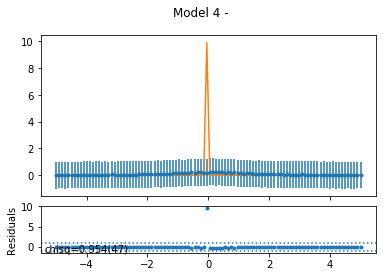

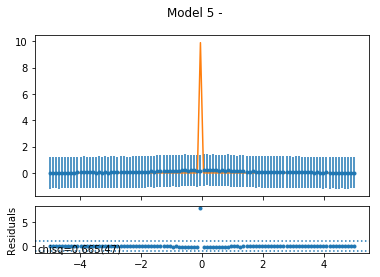

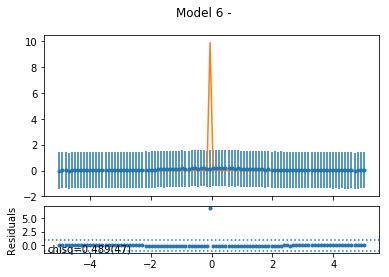

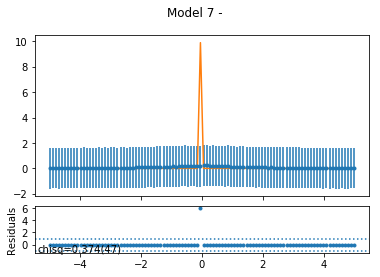

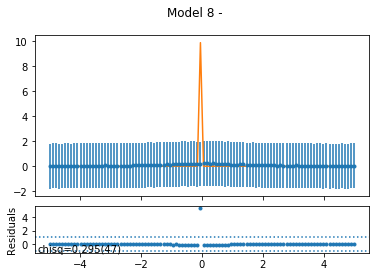

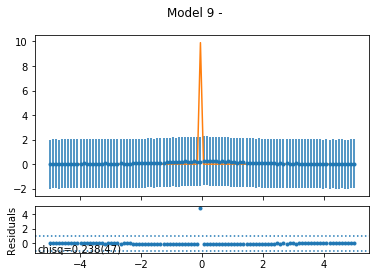

In [45]:
# Preview of the settings
print('Initial chisq', problem.chisq_str())
problem.plot()

(<a href='#Table of Contents'>Top</a>)<a id='run_fit'></a><h2>Running the fit</h2>

Run the fit using the *minimizer* defined above with a number of *steps* also specified above

In [32]:
result = fit(problem, 
             method=chosen_minimizer, 
             steps=steps, 
             verbose=True)

final chisq 0.243(25)
=== Uncertainty est. from curvature: par    dx           dx/sqrt(chisq) ===
                                       D 0.00(10)e9      0.00(20)e9     
                                       L 0.00(10)e9      0.00(20)e9     
                                  center 0.00(10)e9      0.00(20)e9     
                                   scale 0.307(20)       0.307(41)      
                                  center 0.00(10)e9      0.00(20)e9     
                                   scale 0.106(40)       0.106(82)      
                                  center 0.00(10)e9      0.00(20)e9     
                                   scale 54(61)e-3       0.05(12)       
                                  center 0.00(10)e9      0.00(20)e9     
                                   scale 35(81)e-3       0.04(16)       
                                  center 0.00(10)e9      0.00(20)e9     
                                   scale 0.03(10)        0.03(20)       
                          

(<a href='#Table of Contents'>Top</a>)<a id='results'></a><h2>Showing the results </h2>

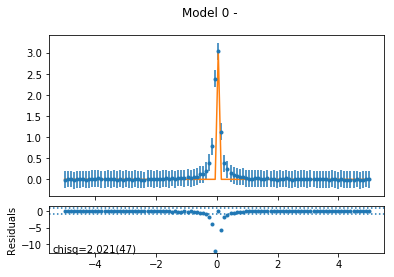

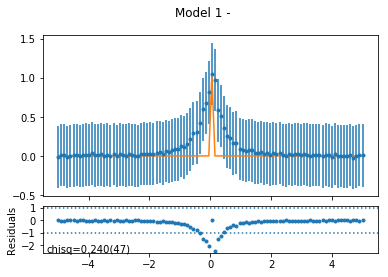

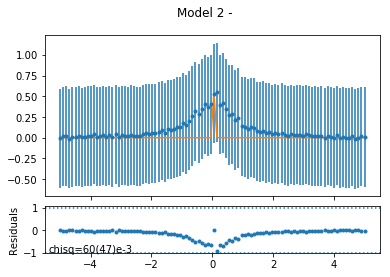

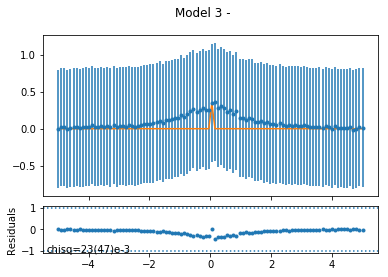

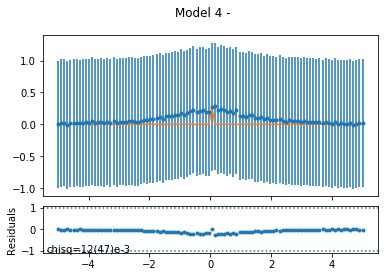

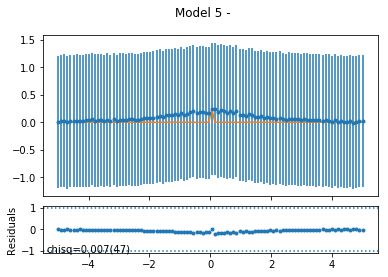

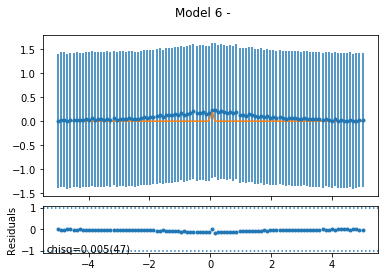

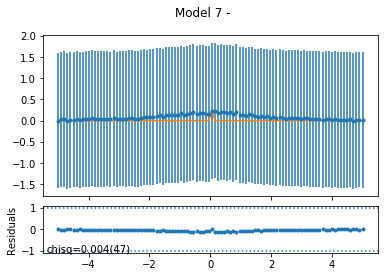

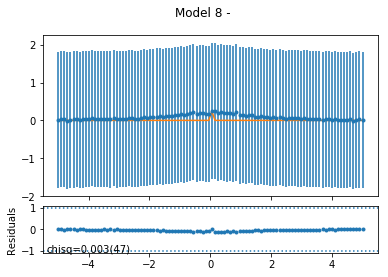

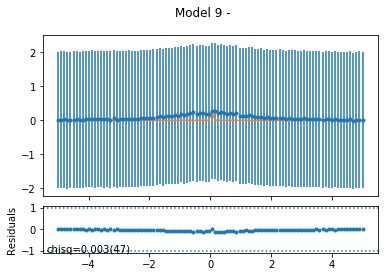

In [33]:
problem.plot()

In [34]:
# Print chi**2 and parameters' values after fit
print("final chisq", problem.chisq_str())
for k, v, dv in zip(problem.labels(), result.x, result.dx):
    print(k, ":", format_uncertainty(v, dv))

final chisq 0.243(25)
D : 0.00(10)e9
L : 0.00(10)e9
center : 0.00(10)e9
scale : 0.307(20)
center : 0.00(10)e9
scale : 0.106(40)
center : 0.00(10)e9
scale : 54(61)e-3
center : 0.00(10)e9
scale : 35(81)e-3
center : 0.00(10)e9
scale : 0.03(10)
center : 0.00(10)e9
scale : 0.02(12)
center : 0.00(10)e9
scale : 0.02(14)
center : 0.00(10)e9
scale : 0.02(16)
center : 0.00(10)e9
scale : 0.02(18)
center : 0.00(10)e9
scale : 0.03(20)
